# 1. Prepare Problem - Telecom Churn Case Study

#### Group Members: 
<b>
    <ol>
        <li> Shubham Gupta</li>
        <li>Priya Aggarwal</li>
    </ol>
</b>

## Business Problem Overview
<b>In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. </b>

## a) Load libraries

In [1]:
#import required libraraies
import numpy as np
import pandas as pd

In [2]:
#Import warning to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#import train_test Split library
from sklearn.model_selection import train_test_split

## b) Load dataset

In [5]:
#Import and read dataset
df=pd.read_csv('telecom_churn_data.csv')

In [6]:
#To show All rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
#view the dataset
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [8]:
#view the dataset from bottom 5 rows
df.tail()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.46,52.79,27.14,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,5.40,3.36,5.91,0.00,12.78,54.46,49.58,24.78,0.00,0.00,0.00,2.25,0.00,0.0,3.21,0.11,18.18,57.83,55.49,27.03,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.41,3.01,3.21,0.11,0.00,0.0,0.0,0.0,20.59,60.84,58.71,27.14,27.68,20.78,40.94,22.06,47.96,46.93,76.08,82.89,17.45,5.16,43.79,49.46,93.09,72.88,160.83,154.43,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00

In [9]:
#check the shape of dataset
df.shape

(99999, 226)

In [10]:
#check the columns sum contains only single value
np.sum(df.nunique()==1)

16

## Data Cleaning

In [11]:
#check the columns contains only single value
unity_col=[i for i in df.columns if df[i].nunique()==1]
unity_col

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [12]:
#Drop the columns with single unique value
df.drop(unity_col,1, inplace=True)

In [13]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute_col = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                   'total_rech_data_9','av_rech_amt_data_6', 'av_rech_amt_data_7',
                   'av_rech_amt_data_8', 'av_rech_amt_data_9','max_rech_data_6', 'max_rech_data_7',
                   'max_rech_data_8', 'max_rech_data_9']

In [14]:
# impute missing values with 0
df[zero_impute_col] = df[zero_impute_col].apply(lambda x: x.fillna(0))

In [15]:
#create categorical columns
categorical_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

In [16]:
#check missing values in ctaegorical columns
df[categorical_cols].isnull().sum()

night_pck_user_6    74846
night_pck_user_7    74428
night_pck_user_8    73660
night_pck_user_9    74077
fb_user_6           74846
fb_user_7           74428
fb_user_8           73660
fb_user_9           74077
dtype: int64

In [17]:
#fill missing values with their mode due to categorical variables
for column in categorical_cols:
    df[column]=df[column].fillna(df[column].mode()[0])

In [18]:
#check the Shape of dataset
df.shape

(99999, 210)

In [19]:
#check the rows containg > 50% missing values. NO of columns is 210 so comparing with 105 i.e. 50%
df.isnull().sum(1)[df.isnull().sum(1) > 105]

201      130
202      131
232      131
275      131
279      131
595      128
661      124
687      125
877      129
1189     131
1206     131
1232     131
1365     128
1485     131
1663     131
2185     108
2262     131
2288     108
2291     124
2470     132
2646     128
3041     131
3110     113
3154     108
3274     131
3360     131
3423     131
3460     131
3506     131
3521     130
3677     118
3682     131
3758     132
4024     123
4160     131
4190     131
4192     131
4226     129
4665     131
4696     130
4751     123
4821     131
4923     128
4968     125
5013     131
5175     123
5220     108
5266     131
5328     132
5453     118
5514     131
5539     128
5884     132
5886     131
5932     131
5983     130
6017     131
6092     129
6117     128
6193     131
6198     131
6337     131
6344     131
6393     108
6491     113
6567     113
6728     131
6768     118
6772     113
6946     108
6984     108
7039     131
7371     125
7693     131
7832     132
7838     123
7922     131

In [20]:
#Drop the rows having more than 50% missing values
df=df.dropna(thresh=105)

In [21]:
#check the columns having > 50% columns. Total ~99K rows 
df.isnull().sum()[df.isnull().sum() > 46000]

date_of_last_rech_data_6    74168
date_of_last_rech_data_7    73725
date_of_last_rech_data_8    72931
date_of_last_rech_data_9    73298
count_rech_2g_6             74168
count_rech_2g_7             73725
count_rech_2g_8             72931
count_rech_2g_9             73298
count_rech_3g_6             74168
count_rech_3g_7             73725
count_rech_3g_8             72931
count_rech_3g_9             73298
arpu_3g_6                   74168
arpu_3g_7                   73725
arpu_3g_8                   72931
arpu_3g_9                   73298
arpu_2g_6                   74168
arpu_2g_7                   73725
arpu_2g_8                   72931
arpu_2g_9                   73298
dtype: int64

In [22]:
#chekc the columns name having > 50% missing values
null_data=list(df.isnull().sum()[df.isnull().sum() > 46000].to_dict().keys())
null_data

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9']

In [23]:
#Drop the columns with 50% missing value
df.drop(null_data, 1, inplace=True)

In [24]:
#drop date columns and unique ids like mobile_number
df=df.drop(columns=['mobile_number','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'])

In [25]:
# Checking percentage of missing values 
missing_value_col = list(df.isnull().sum()[df.isnull().sum()>0].to_dict().keys())
#missing_value_col

In [26]:
#fill missing values with their medians due to outliers
for column in missing_value_col:
    df[column]=df[column].fillna(df[column].median())

In [27]:
#Data_Filtering
#High Value customer
df=df[(df['total_rech_amt_6']+df['total_rech_data_6']+df['total_rech_amt_7']+df['total_rech_data_7']) >= (df['total_rech_amt_6']+df['total_rech_data_6']+df['total_rech_amt_7']+df['total_rech_data_7']).quantile(0.7)]
df.shape

(29737, 185)

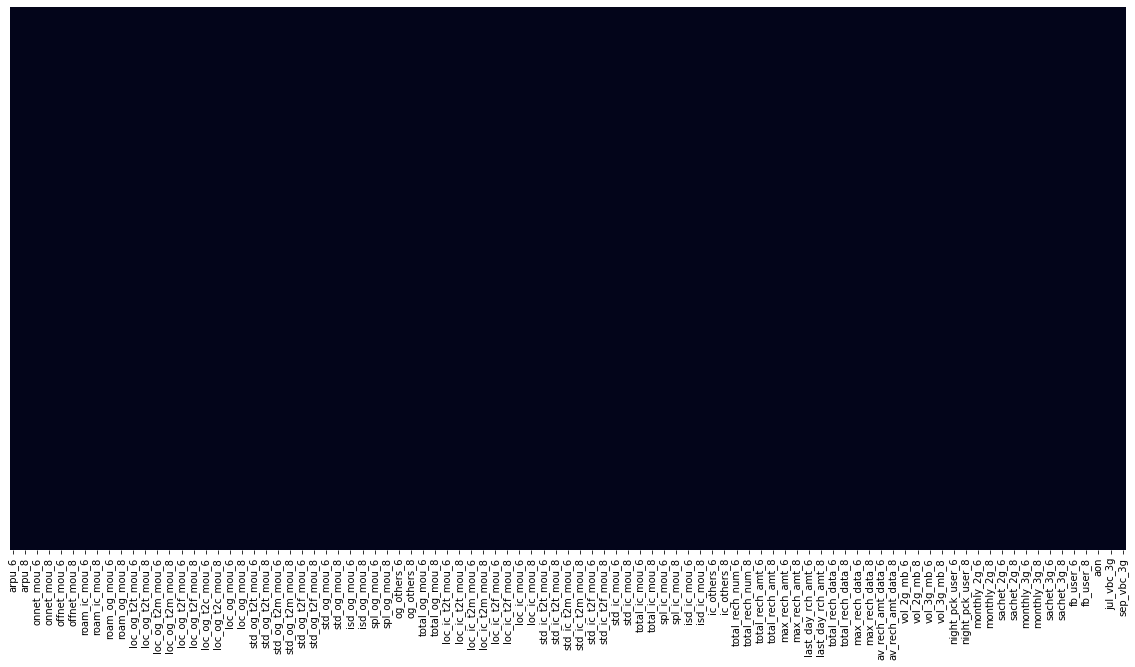

In [28]:
#check is any null value exist in dataset from heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.show()

### Churn labeling

In [29]:
#define Churn labeling
df['churn']=df[['total_og_mou_9', 'total_ic_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].apply(lambda X : 1 if 
                                                                                         (X['total_og_mou_9']==0) & 
                                                                                         (X['total_ic_mou_9']==0) & 
                                                                                         (X['vol_2g_mb_9']==0) & 
                                                                                         (X['vol_3g_mb_9']==0) else 0, axis=1)

In [30]:
#get 9th month KPI columns list
_9_attr=[i for i in df.columns if '_9' in i]
_9_attr

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9']

In [31]:
#drop Churned month i.e. 9th month KPI columns
df.drop(_9_attr, 1, inplace=True)
df.shape

(29737, 141)

### New Features Derivation

In [32]:
#create new features from 6th,7th and 8th month 
_6KPI=[i for i in df.columns if ('_6' in i) & (i not in ['night_pck_user_6', 'fb_user_6'])]
_7KPI=[i for i in df.columns if ('_7' in i) & (i not in ['night_pck_user_7', 'fb_user_7'])]
_8KPI=[i for i in df.columns if ('_8' in i) & (i not in ['night_pck_user_8', 'fb_user_8'])]

In [33]:
#new features is difference between 8th month and average of 6th and 7th month
for i,j,k in zip(_6KPI,_7KPI,_8KPI) :
    df[i[0:-2]+'_D']= df[k]-((df[i]+df[j])/2)

In [34]:
#caculate % of chuen class i.e. 0-> Not churn, 1-> Churned
df.churn.value_counts(normalize=True)*100

0    91.498806
1     8.501194
Name: churn, dtype: float64

In [35]:
#check the final shpae after data cleaning and new features derivation
df.shape

(29737, 184)


# 2. Summarize Data

## a) Descriptive statistics

In [36]:
#check description of dataset
df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,arpu_D,onnet_mou_D,offnet_mou_D,roam_ic_mou_D,roam_og_mou_D,loc_og_t2t_mou_D,loc_og_t2m_mou_D,loc_og_t2f_mou_D,loc_og_t2c_mou_D,loc_og_mou_D,std_og_t2t_mou_D,std_og_t2m_mou_D,std_og_t2f_mou_D,std_og_mou_D,isd_og_mou_D,spl_og_mou_D,og_others_D,total_og_mou_D,loc_ic_t2t_mou_D,loc_ic_t2m_mou_D,loc_ic_t2f_mou_D,loc_ic_mou_D,std_ic_t2t_mou_D,std_ic_t2m_mou_D,std_ic_t2f_mou_D,std_ic_mou_D,total_ic_mou_D,spl_ic_mou_D,isd_ic_mou_D,ic_others_D,total_rech_num_D,total_rech_amt_D,max_rech_amt_D,last_day_rch_amt_D,total_rech_data_D,max_rech_data_D,av_rech_amt_data_D,vol_2g_mb_D,vol_3g_mb_D,monthly_2g_D,sachet_2g_D,monthly_3g_D,sachet_3g_D
count,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000000,29737.000

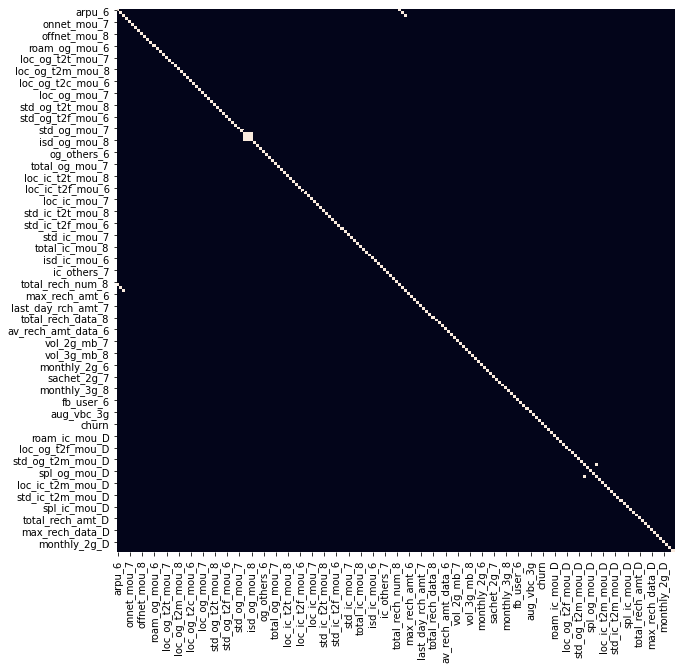

In [37]:
# check the correlation of dataset
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().applymap(lambda x : 1 if np.abs(x)>=0.90 else 0), cbar=False)
plt.show()

## b) Data visualizations

In [38]:
#get new derived features/columns list
_DKPI = [i for i in df.columns if ('_D' in i)]
_DKPI

['arpu_D',
 'onnet_mou_D',
 'offnet_mou_D',
 'roam_ic_mou_D',
 'roam_og_mou_D',
 'loc_og_t2t_mou_D',
 'loc_og_t2m_mou_D',
 'loc_og_t2f_mou_D',
 'loc_og_t2c_mou_D',
 'loc_og_mou_D',
 'std_og_t2t_mou_D',
 'std_og_t2m_mou_D',
 'std_og_t2f_mou_D',
 'std_og_mou_D',
 'isd_og_mou_D',
 'spl_og_mou_D',
 'og_others_D',
 'total_og_mou_D',
 'loc_ic_t2t_mou_D',
 'loc_ic_t2m_mou_D',
 'loc_ic_t2f_mou_D',
 'loc_ic_mou_D',
 'std_ic_t2t_mou_D',
 'std_ic_t2m_mou_D',
 'std_ic_t2f_mou_D',
 'std_ic_mou_D',
 'total_ic_mou_D',
 'spl_ic_mou_D',
 'isd_ic_mou_D',
 'ic_others_D',
 'total_rech_num_D',
 'total_rech_amt_D',
 'max_rech_amt_D',
 'last_day_rch_amt_D',
 'total_rech_data_D',
 'max_rech_data_D',
 'av_rech_amt_data_D',
 'vol_2g_mb_D',
 'vol_3g_mb_D',
 'monthly_2g_D',
 'sachet_2g_D',
 'monthly_3g_D',
 'sachet_3g_D']

In [39]:
#create a function for univariate analysis plot
def plotcont(feature) :
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    sns.distplot(df[feature])
    plt.subplot(1,3,2)
    sns.boxplot(df[feature])
    plt.subplot(1,3,3)
    sns.scatterplot(x=feature, y='churn', data=df)
    plt.show() 

## Univariate Analysis 

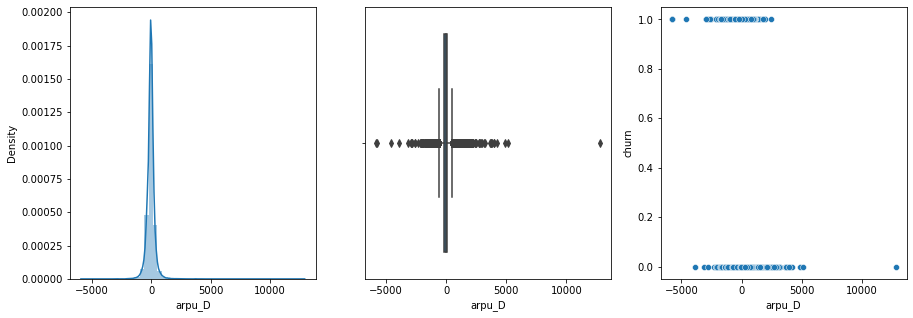

In [40]:
#plot the avg revenue per user differnce
plotcont('arpu_D')

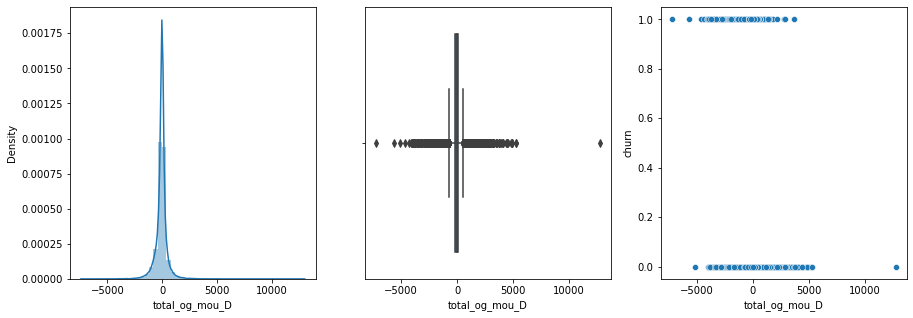

In [41]:
#plot the total out going month difference
plotcont('total_og_mou_D')

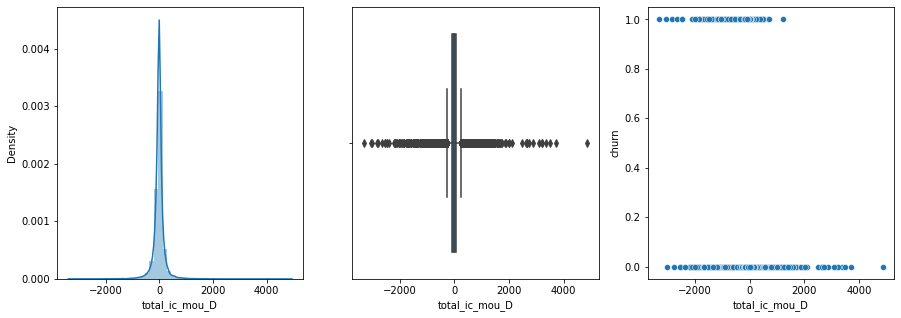

In [42]:
#plot for Total incoming call diff plot
plotcont('total_ic_mou_D')

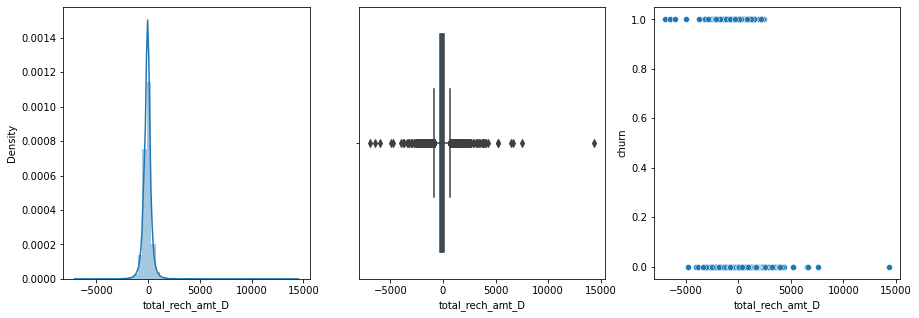

In [43]:
#plot for total recharge amount difference
plotcont('total_rech_amt_D')

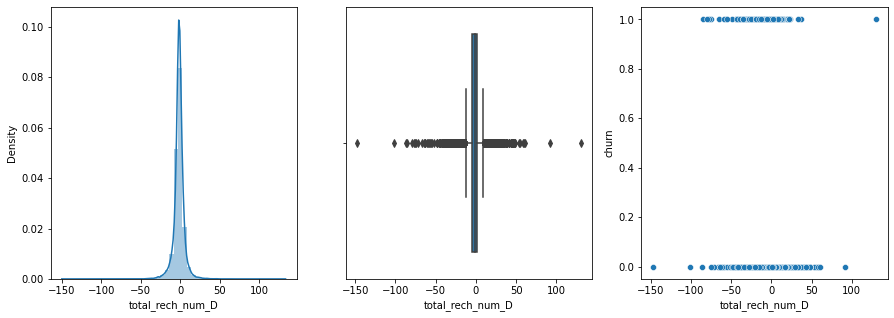

In [44]:
#Plot the Total number of times recharge differnce
plotcont('total_rech_num_D')

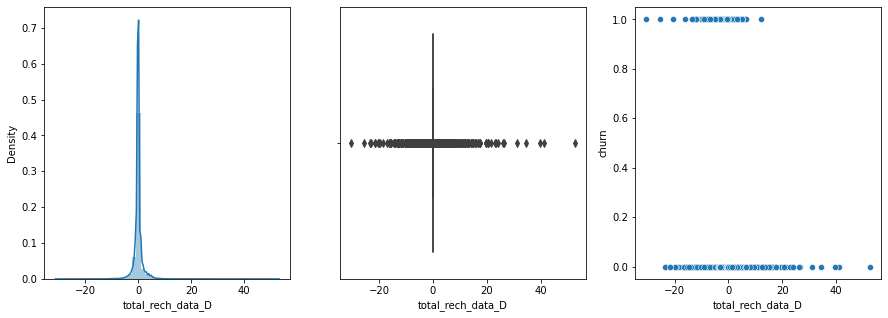

In [45]:
# plot for total reacharge data differnce
plotcont('total_rech_data_D')

## Bivariate Analysis

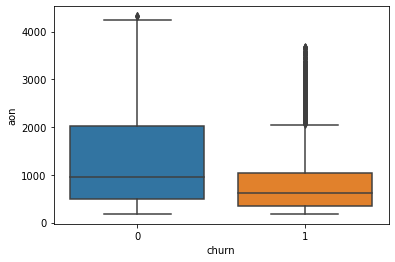

In [46]:
#check the churn with area on network
sns.boxplot(df.churn, df.aon)
plt.show()

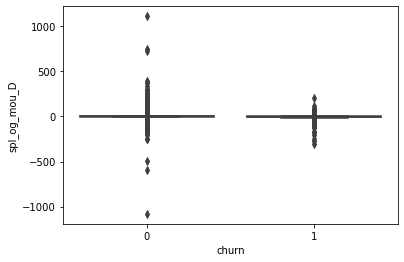

In [47]:
#plot the special outgoing with new dervied feature & Churn
sns.boxplot(df.churn, df.spl_og_mou_D)
plt.show()

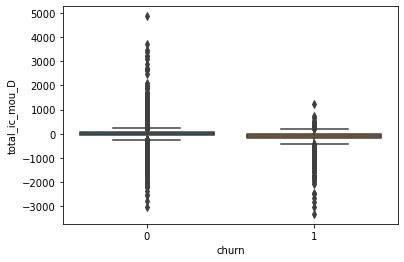

In [48]:
#plot the total incoming with Churn
sns.boxplot(df.churn, df.total_ic_mou_D)
plt.show()

# 3. Prepare Data & White Box model

In [50]:
#load required libraries for feature selection with Logistic Regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
#from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

In [51]:
#create X and Y label
X=df.drop(['churn'], 1)
y=df[['churn']]

In [52]:
#spli the data in train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [53]:
# Random Forest - the class weight is used to handle class imbalance - it adjusts the cost function
r_forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
md_params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
cv_folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# intialize gridsearch object
model = GridSearchCV(estimator=r_forest, cv=cv_folds, param_grid=md_params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [54]:
# fit train model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [55]:
# print best hyperparameters
print("Best AUC Score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC Score:  0.9358162364297625
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [56]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
#sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
#print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5349   93]
 [ 278  228]]
AUC:    	 0.92


In [57]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, 
                                  class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

14


In [58]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.0min finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=14,
                       oob_score=True, random_state=4, verbose=1)

In [59]:
# OOB score
rf_model.oob_score_

0.9411913069065535

In [60]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
#sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
#print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[5361   81]
 [ 292  214]]
ROC:    	 0.92


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [61]:
# Let's check the report of our default model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5442
           1       0.73      0.42      0.53       506

    accuracy                           0.94      5948
   macro avg       0.84      0.70      0.75      5948
weighted avg       0.93      0.94      0.93      5948



In [62]:
print(accuracy_score(y_test,y_pred))

0.9372898453261601


### Feature Importance

In [63]:
# GridSearchCV to find optimal max_features

# feature_importance
importance = rf_model.feature_importances_

In [64]:
#get the series of important features with score
important_features = pd.Series(data=rf_model.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)

In [65]:
#list the important features
important_features

total_ic_mou_8        0.057849
total_og_mou_8        0.043339
total_rech_amt_D      0.034640
arpu_D                0.027817
arpu_8                0.027002
loc_og_mou_8          0.026886
total_og_mou_D        0.026852
total_rech_amt_8      0.026553
last_day_rch_amt_8    0.026244
roam_og_mou_8         0.025321
loc_og_t2m_mou_8      0.024348
loc_ic_mou_8          0.024043
loc_ic_t2m_mou_8      0.023896
roam_ic_mou_8         0.021894
offnet_mou_8          0.020286
total_ic_mou_D        0.018232
roam_og_mou_D         0.015387
loc_og_t2t_mou_8      0.013668
loc_ic_t2t_mou_8      0.013366
roam_ic_mou_D         0.012409
std_og_mou_D          0.010577
std_ic_mou_8          0.009952
std_ic_t2m_mou_8      0.009352
last_day_rch_amt_D    0.008863
loc_ic_t2f_mou_8      0.008846
total_rech_num_D      0.008314
std_og_mou_8          0.008235
loc_ic_mou_7          0.008171
total_rech_num_8      0.008068
onnet_mou_8           0.007602
loc_ic_t2m_mou_D      0.007600
max_rech_amt_8        0.007314
loc_ic_m

In [66]:
#Use top 30 features

top_features_no = 30
top_features = list(important_features[0:top_features_no].to_dict().keys())
top_features

['total_ic_mou_8',
 'total_og_mou_8',
 'total_rech_amt_D',
 'arpu_D',
 'arpu_8',
 'loc_og_mou_8',
 'total_og_mou_D',
 'total_rech_amt_8',
 'last_day_rch_amt_8',
 'roam_og_mou_8',
 'loc_og_t2m_mou_8',
 'loc_ic_mou_8',
 'loc_ic_t2m_mou_8',
 'roam_ic_mou_8',
 'offnet_mou_8',
 'total_ic_mou_D',
 'roam_og_mou_D',
 'loc_og_t2t_mou_8',
 'loc_ic_t2t_mou_8',
 'roam_ic_mou_D',
 'std_og_mou_D',
 'std_ic_mou_8',
 'std_ic_t2m_mou_8',
 'last_day_rch_amt_D',
 'loc_ic_t2f_mou_8',
 'total_rech_num_D',
 'std_og_mou_8',
 'loc_ic_mou_7',
 'total_rech_num_8',
 'onnet_mou_8']

<AxesSubplot:>

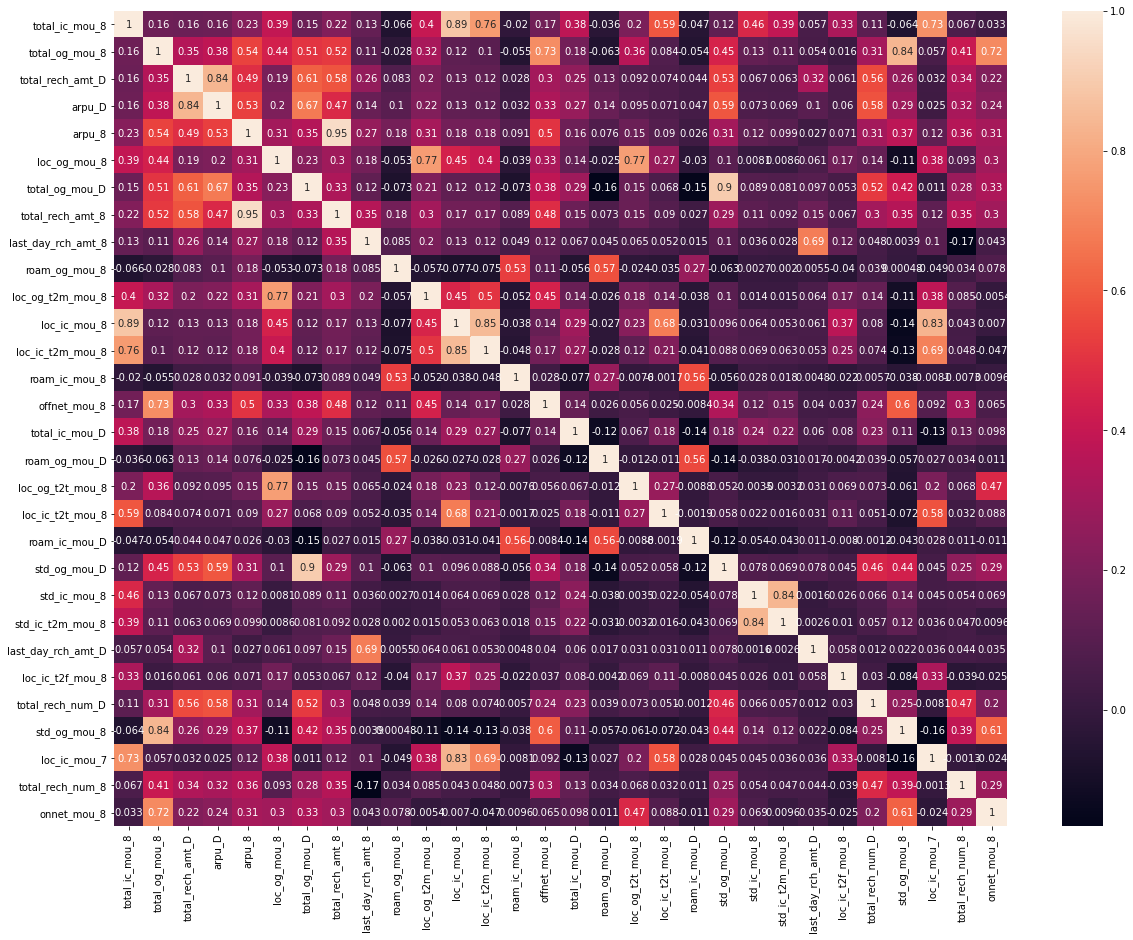

In [67]:
# plot feature correlation
plt.rcParams["figure.figsize"] =(20,15)
# mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(),annot=True)

## a) Feature Selection

### New Logistic Regression Model with Top 9 Features

In [68]:
#Selecting features that are relevent
top_features = ['total_ic_mou_8', 'total_rech_amt_D', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 
                'roam_og_mou_8', 'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [69]:
#create step to creat model
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [70]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [71]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8817643909957859
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [72]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
#sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
#print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4504  938]
 [ 104  402]]
ROC:    	 0.87


In [73]:
# Let's check the report of our New model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      5442
           1       0.30      0.79      0.44       506

    accuracy                           0.82      5948
   macro avg       0.64      0.81      0.67      5948
weighted avg       0.92      0.82      0.86      5948



In [74]:
print(accuracy_score(y_test,y_pred))

0.8248150638870209


In [75]:
#Intialize model with best estimator
logistic_model = model.best_estimator_.named_steps['logistic']

In [76]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [77]:
# coefficients
coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]
coefficients_1 = coefficients
logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [78]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,total_rech_amt_D,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,-1.60303,-1.257034,-0.830288,-2.174634,0.199923,0.024394,0.192729,0.285501,-0.764872,1.553714


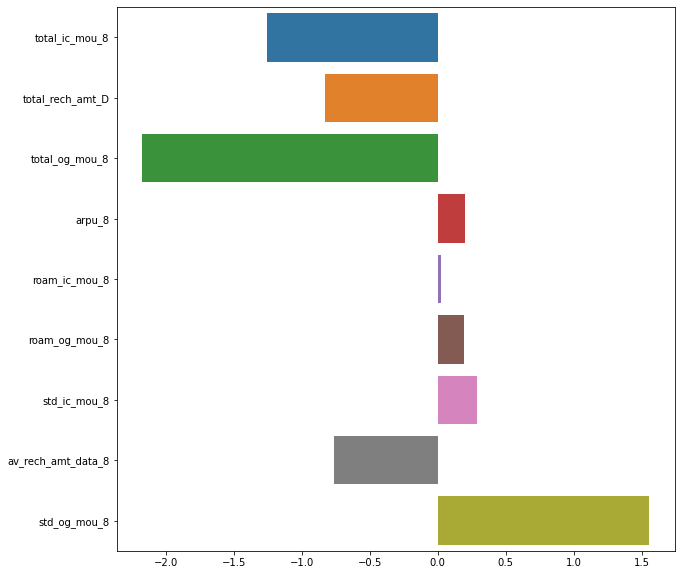

In [85]:
#plot the barplot with important features
plt.figure(figsize=(10,10))
sns.barplot(y=logistic_features,x=logistic_model.coef_[0])
plt.show()

# 4. Evaluate Algorithms

## Dimensionaly Reduction

In [86]:
#import PCA
from sklearn.decomposition import PCA

In [87]:
#scale the data
scale = StandardScaler()
X=scale.fit_transform(X)

In [88]:
#intailze pca
pca = PCA(0.95, random_state=0)

In [89]:
#fit the model with pca
pca.fit(X)

PCA(n_components=0.95, random_state=0)

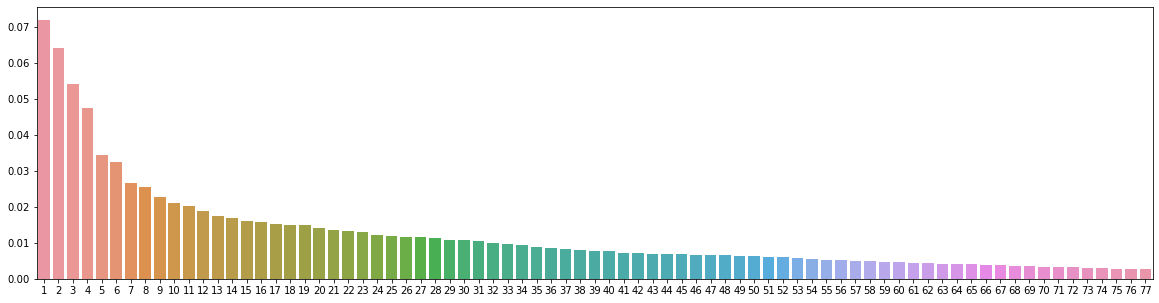

In [90]:
#plot the features with pca
plt.figure(figsize=(20,5))
sns.barplot(x=list(range(1,len(pca.explained_variance_ratio_)+1)), y=pca.explained_variance_ratio_)
plt.show()

In [91]:
#Fit & transform the data
X=pca.fit_transform(X)

In [92]:
#train and test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# 5. Improve Accuracy

## a) Algorithm Tuning

In [93]:
#import xgboost
from xgboost import XGBClassifier

In [94]:
#intialize the xgboost object
model=XGBClassifier(scale_pos_weight=10.76)

In [95]:
#fit the model with xgboost
model.fit(X_train, y_train ,eval_metric='auc', eval_set=[(X_train,y_train),(X_test,y_test)], early_stopping_rounds= 10)

[0]	validation_0-auc:0.89845	validation_1-auc:0.84956
[1]	validation_0-auc:0.91996	validation_1-auc:0.86235
[2]	validation_0-auc:0.92888	validation_1-auc:0.86136
[3]	validation_0-auc:0.93566	validation_1-auc:0.86609
[4]	validation_0-auc:0.94152	validation_1-auc:0.86932
[5]	validation_0-auc:0.94584	validation_1-auc:0.87321
[6]	validation_0-auc:0.94988	validation_1-auc:0.87595
[7]	validation_0-auc:0.95392	validation_1-auc:0.87745
[8]	validation_0-auc:0.95740	validation_1-auc:0.87766
[9]	validation_0-auc:0.95951	validation_1-auc:0.87597
[10]	validation_0-auc:0.96277	validation_1-auc:0.87626
[11]	validation_0-auc:0.96543	validation_1-auc:0.87642
[12]	validation_0-auc:0.96796	validation_1-auc:0.87704
[13]	validation_0-auc:0.97001	validation_1-auc:0.87656
[14]	validation_0-auc:0.97133	validation_1-auc:0.87552
[15]	validation_0-auc:0.97236	validation_1-auc:0.87629
[16]	validation_0-auc:0.97451	validation_1-auc:0.87680
[17]	validation_0-auc:0.97623	validation_1-auc:0.87652
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10.76, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [96]:
#check the accuracy of test & train
print('accuracy score Train Set : {:.5f}'.format(model.score(X_train, y_train)))
print('accuracy score Test Set : {:.5f}'.format(model.score(X_test, y_test)))

accuracy score Train Set : 0.89100
accuracy score Test Set : 0.86483


In [97]:
#create confusion matrix of train data
confusion_matrix(y_train, model.predict(X_train))

array([[19352,  2415],
       [  178,  1844]], dtype=int64)

In [98]:
#create confusion matrix of test data
confusion_matrix(y_test, model.predict(X_test))

array([[4769,  673],
       [ 131,  375]], dtype=int64)

In [99]:
# Import RandomizedSearchCV
from sklearn.model_selection import  RandomizedSearchCV

In [100]:
#create Kfold 
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

# Obtain scores of cross-validation
scores = cross_val_score(model, X, y, cv=kfold, scoring='recall')

# Display accuracy
print('recall:', np.round(scores, 2))

# Display mean accuracy
print('recall mean: %0.2f' % (scores.mean()))

[11:10:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:12:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [101]:
#create function to get model with diff parameters
def grid_search(params, random=False): 
    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, scale_pos_weight=10.76, n_estimators=200)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    if random:
        grid = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=20, n_jobs=-1, random_state=2, scoring='roc_auc', verbose=2)
    else:
        # Instantiate GridSearchCV as grid_reg
        grid = GridSearchCV(xgb, params, cv=kfold, n_jobs=-1, scoring='roc_auc', verbose=2)
    # Fit grid_reg on X_train and y_train
    grid.fit(X, y)
    # Extract best params
    best_params = grid.best_params_
    # Print best params
    print("Best params:", best_params)
    # Compute best score
    best_score = grid.best_score_
    # Print best score
    print("Best score: {:.5f}".format(best_score))

In [102]:
#call a function with multiple values
grid_search(params={'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                    'min_child_weight':[1, 2, 3, 4, 5], 
                    'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5], 
                    'max_depth':[1, 2, 3, 4, 5, None], 
                    'n_estimators':[50, 75, 100, 125, 150], 
                    }, random=True)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[11:42:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best params: {'subsample': 0.6, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.1}
Best score: 0.89676


# 6. Finalize Model

In [103]:
#create final model with best estimators
model_final=XGBClassifier(scale_pos_weight=10.76, subsample= 0.6, 
                          n_estimators= 500, min_child_weight= 5, 
                          max_depth= 3, learning_rate= 0.1 )
model_final.fit(X_train, y_train ,eval_metric='auc', eval_set=[(X_train,y_train),(X_test,y_test)], early_stopping_rounds= 10)

[0]	validation_0-auc:0.83627	validation_1-auc:0.80847
[1]	validation_0-auc:0.85900	validation_1-auc:0.83617
[2]	validation_0-auc:0.86584	validation_1-auc:0.84271
[3]	validation_0-auc:0.86892	validation_1-auc:0.84391
[4]	validation_0-auc:0.87139	validation_1-auc:0.84747
[5]	validation_0-auc:0.87689	validation_1-auc:0.85253
[6]	validation_0-auc:0.87836	validation_1-auc:0.85407
[7]	validation_0-auc:0.88058	validation_1-auc:0.85441
[8]	validation_0-auc:0.88164	validation_1-auc:0.85478
[9]	validation_0-auc:0.88241	validation_1-auc:0.85603
[10]	validation_0-auc:0.88474	validation_1-auc:0.85774
[11]	validation_0-auc:0.88628	validation_1-auc:0.85821
[12]	validation_0-auc:0.88827	validation_1-auc:0.86078
[13]	validation_0-auc:0.89040	validation_1-auc:0.86229
[14]	validation_0-auc:0.89202	validation_1-auc:0.86379
[15]	validation_0-auc:0.89298	validation_1-auc:0.86499
[16]	validation_0-auc:0.89407	validation_1-auc:0.86632
[17]	validation_0-auc:0.89551	validation_1-auc:0.86739
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10.76, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
#calculate the train & test accuracy
print('accuracy score Train Set : {:.5f}'.format(model_final.score(X_train, y_train)))
print('accuracy score Test Set : {:.5f}'.format(model_final.score(X_test, y_test)))

accuracy score Train Set : 0.86107
accuracy score Test Set : 0.84566


In [105]:
#import Recall library
from sklearn.metrics import recall_score

In [106]:
#calculate recall for train and test score
print('recall score Train Set : {:.5f}'.format(recall_score(y_train, model_final.predict(X_train))))
print('recall score Test Set : {:.5f}'.format(recall_score(y_test, model_final.predict(X_test))))

recall score Train Set : 0.84520
recall score Test Set : 0.76877


## Suggestion :
1. Instead of resampling we adjusted the Class-weight
2. Important Parameter for Churn Prediction are visualise above
3. Total Outgoing Call for 8th month is very important factor in deciding Churn predication
4. STD Calls usage is also important factor, telecom company can provide some voucher/Coupon for STD rates
5. If Total incoming call are less compare to previous month, there might be chance of churn